# Task 4.10 - Book 1.  Regional segmentation of the Instacart data

##  The small dataframe sample of the Instacart dataframe will be used to conduct analysis and develop visualizations.

# This script contains the following points:

## 1. Import small dataframe

## 2. Analysis of security implications

## 3. Determining regions and sales by regions

In [1]:
# Import panda, numpy, os libraries

import pandas as pd
import numpy as np
import os

## Because of the size of the full orders_products_merged dataframe (rows, columns), anlysis will continue using the small sample datframe used in the previous exercise.

## 1. Import small dataframe

In [2]:
path = r'C:\Users\howl6\OneDrive\Certificates\CareerFoundry\Coursework\Data_Immersion\Chapter 4\Instacart Basket Analysis'

In [3]:
# Import small_cop_sample dataframe

df_cust = pd.read_pickle(os.path.join(path,'02_Data','Prepared_Data', 'small_cop_sample.pkl'))

In [4]:
df_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,first_name,surname,gender,state,age,date_joined,num_of_dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
10,7987,Hazelnut Spread with Cocoa,88,13,12.8,1592314,138,5,0,9,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


In [5]:
df_cust.tail()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,first_name,surname,gender,state,age,date_joined,num_of_dependants,family_status,income,_merge
32404841,49235,Organic Half & Half,53,16,1.8,2939801,27382,3,3,8,...,Anna,Allison,Female,Vermont,68,11/25/2019,3,married,37867,both
32404842,49235,Organic Half & Half,53,16,1.8,698928,27382,4,3,7,...,Anna,Allison,Female,Vermont,68,11/25/2019,3,married,37867,both
32404843,49235,Organic Half & Half,53,16,1.8,3310701,27382,5,3,9,...,Anna,Allison,Female,Vermont,68,11/25/2019,3,married,37867,both
32404849,49235,Organic Half & Half,53,16,1.8,952054,56454,2,3,9,...,Christopher,Velazquez,Male,Washington,21,2/16/2019,3,living with parents and siblings,27361,both
32404850,49235,Organic Half & Half,53,16,1.8,1189204,56454,3,1,19,...,Christopher,Velazquez,Male,Washington,21,2/16/2019,3,living with parents and siblings,27361,both


In [6]:
# Data types

df_cust.dtypes

product_id                    int64
product_name                 object
aisle_id                      int64
department_id                 int64
prices                      float64
order_id                      int64
user_id                      object
order_number                  int64
orders_day_of_week            int64
order_time_of_day             int64
days_since_prior_order      float64
first_time_order               bool
add_to_cart_order             int64
reordered                     int64
price_range_loc              object
busiest_day                  object
busiest_days                 object
busiest_period_of_day        object
max_order                     int64
loyalty_flag                 object
mean_prices                 float64
spending_flag                object
median_days_prior_order     float64
frequency_flag               object
first_name                   object
surname                      object
gender                       object
state                       

In [7]:
df_cust.shape

(9721098, 34)

In [8]:
df_cust.describe()

,product_id,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_prices,median_days_prior_order,age,num_of_dependants,income
count,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.098421e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721096e+06,9.721098e+06,9.721098e+06,9.721098e+06
mean,2.559919e+04,7.118637e+01,9.916921e+00,1.196327e+01,1.710382e+06,1.714078e+01,2.738444e+00,1.342467e+01,1.110574e+01,8.352290e+00,5.895577e-01,3.304783e+01,1.198767e+01,1.039815e+01,4.946312e+01,1.501945e+00,9.944555e+04
std,1.408325e+04,3.821429e+01,6.281223e+00,4.923865e+02,9.874306e+05,1.753615e+01,2.089993e+00,4.244412e+00,8.779462e+00,7.126665e+00,4.919141e-01,2.515526e+01,8.257014e+01,7.132534e+00,1.848655e+01,1.118746e+00,4.308561e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.555800e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.386957e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.699100e+04
50%,2.530900e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710702e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.824688e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.663000e+04
75%,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565431e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.253789e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279160e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.430000e+02,1.000000e+00,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


## 2.  Analysis of security implications

## Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

## The following columns in this dataset could be potential PII data: first_name, surname, gender, age, num_of_dependants, family_status, and income. If not handled securely, this information could be compromising to individuals from whom this dataframe has been compiled.  I will inform the Instacart team of this information and seek guidance from them on what to do with the identified PII. I will not remove columns containing PII unless otherwise told to due so by the Instacart team.

## 3. Determining regions and sales by regions

### Assigning states by region using the loc function.

In [9]:
df_cust.loc[(df_cust['state'] == 'Maine')|
(df_cust['state'] == 'New Hampshire')|
(df_cust['state'] == 'Vermont')|
(df_cust['state'] == 'Massachusetts')|
(df_cust['state'] == 'Rhode Island')|
(df_cust['state'] == 'Connecticut')|
(df_cust['state'] == 'New York')|
(df_cust['state'] == 'Pennsylvania')|
(df_cust['state'] == 'New Jersey'),'region'] = 'northeast_region'

In [10]:
df_cust.loc[(df_cust['state'] == 'Wisconsin')|
(df_cust['state'] == 'Michigan')|
(df_cust['state'] == 'Illinois')|
(df_cust['state'] == 'Indiana')|
(df_cust['state'] == 'Ohio')|
(df_cust['state'] == 'North Dakota')|
(df_cust['state'] == 'South Dakota')|
(df_cust['state'] == 'Nebraska')|
(df_cust['state'] == 'Kansas')|
(df_cust['state'] == 'Minnesota')|
(df_cust['state'] == 'Iowa')|
(df_cust['state'] == 'Missouri'), 'region'] = 'midwest_region'

In [11]:
df_cust.loc[(df_cust['state'] == 'Delaware')|
(df_cust['state'] == 'Maryland')|
(df_cust['state'] == 'District of Columbia')|
(df_cust['state'] == 'Virginia')|
(df_cust['state'] == 'West Virginia')|
(df_cust['state'] == 'North Carolina')|
(df_cust['state'] == 'South Carolina')|
(df_cust['state'] == 'Georgia')|
(df_cust['state'] == 'Florida')|
(df_cust['state'] == 'Kentucky')|
(df_cust['state'] == 'Tennessee')|
(df_cust['state'] == 'Mississippi')|
(df_cust['state'] == 'Alabama')|
(df_cust['state'] == 'Oklahoma')|
(df_cust['state'] == 'Texas')|
(df_cust['state'] == 'Arkansas')|
(df_cust['state'] == 'Louisiana'), 'region'] = 'south_region'

In [12]:
df_cust.loc[(df_cust['state'] == 'Idaho')|
(df_cust['state'] =='Montana')|
(df_cust['state'] =='Wyoming')|
(df_cust['state'] =='Nevada')|
(df_cust['state'] =='Utah')|
(df_cust['state'] =='Colorado')|
(df_cust['state'] =='Arizona')|
(df_cust['state'] =='New Mexico'), 'region'] = 'west_region'

In [13]:
df_cust.loc[(df_cust['state'] == 'Alaska')|
(df_cust['state'] =='Washington')|
(df_cust['state'] =='Oregon')|
(df_cust['state'] =='California')|
(df_cust['state'] =='Hawaii'), 'region'] = 'pacific_region'

In [14]:
df_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,surname,gender,state,age,date_joined,num_of_dependants,family_status,income,_merge,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region
10,7987,Hazelnut Spread with Cocoa,88,13,12.8,1592314,138,5,0,9,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region


## Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [41]:
# Import visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [69]:
df_cust['spent'] = df_cust['prices'] * df_cust['order_number']

In [71]:
# Changed 'Spent' to 'spent' thereby accidentally creating duplicate columns.

df_cust.drop(columns=['Spent'])

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,gender,state,age,date_joined,num_of_dependants,family_status,income,_merge,region,spent
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,162.4
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,20.0
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,200.0
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,101.2
10,7987,Hazelnut Spread with Cocoa,88,13,12.8,1592314,138,5,0,9,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404841,49235,Organic Half & Half,53,16,1.8,2939801,27382,3,3,8,...,Female,Vermont,68,11/25/2019,3,married,37867,both,northeast_region,5.4
32404842,49235,Organic Half & Half,53,16,1.8,698928,27382,4,3,7,...,Female,Vermont,68,11/25/2019,3,married,37867,both,northeast_region,7.2
32404843,49235,Organic Half & Half,53,16,1.8,3310701,27382,5,3,9,...,Female,Vermont,68,11/25/2019,3,married,37867,both,northeast_region,9.0
32404849,49235,Organic Half & Half,53,16,1.8,952054,56454,2,3,9,...,Male,Washington,21,2/16/2019,3,living with parents and siblings,27361,both,pacific_region,3.6


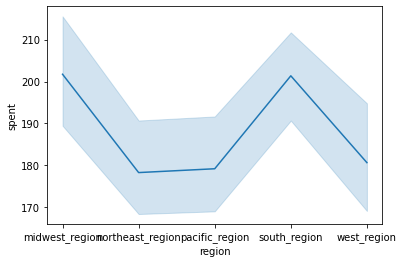

In [65]:
spend_line = sns.lineplot(data = df_cust, x = 'region', y = 'spent')

### Based on the analysis of customer expenditures by region, it appears that customers in the midwest and south regions are greater spenders when compared to the other three regions.  The west region is slightly higher then the pacific region, which in turn is slightly higher than the northeast region.  The northeast region is thereby the lowest spender by region.

In [66]:
spend_line.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'region_spent_line.png'))

In [15]:
# Export revised small_cop_sample dataframe
df_cust.to_pickle(os.path.join(path, '02_Data','Prepared_Data', 'small_cop_sample.pkl'))